NSW Max Temperatue Average
---------------------------

Use Spark DataFrames and SQL (option) to calulate montly averages of max temperature. Australian BOM data is provided, from 41 weather stations around Sydney (radius 50 km), years 1890–2012


_Hints:_

* use `groupby` and `avg` operations

In [29]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

rawDF = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true', delimiter=',')\
    .load('spark-data/nsw_temp.csv')

In [33]:
rawDF.printSchema()

root
 |-- Product code: string (nullable = true)
 |-- Bureau of Meteorology station number: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Maximum temperature (Degree C): double (nullable = true)
 |-- Days of accumulation of maximum temperature: integer (nullable = true)
 |-- Quality: string (nullable = true)



In [36]:
df = rawDF.toDF('product_code', 'bom_station_number', 'year', 'month', 'day', 'max_temp', 'days_of_acc', 'quality')

In [37]:
df.printSchema()

root
 |-- product_code: string (nullable = true)
 |-- bom_station_number: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- max_temp: double (nullable = true)
 |-- days_of_acc: integer (nullable = true)
 |-- quality: string (nullable = true)



In [38]:
df.count()

352696

In [68]:
df.limit(5).toPandas()

,product_code,bom_station_number,year,month,day,max_temp,days_of_acc,quality
0,IDCJAC0010,61087,1965,1,1,25.6,NaN,Y
1,IDCJAC0010,61087,1965,1,2,32.2,1.0,Y
2,IDCJAC0010,61087,1965,1,3,23.1,1.0,Y
3,IDCJAC0010,61087,1965,1,4,25.6,1.0,Y
4,IDCJAC0010,61087,1965,1,5,26.7,1.0,Y


In [70]:
temps_by_month = df.groupby('month').avg('max_temp').toPandas()
temps_by_month

,month,avg(max_temp)
0,1,27.795612
1,2,27.328411
2,3,25.933482
3,4,23.383713
4,5,20.137379
5,6,17.487661
6,7,17.016035
7,8,18.620955
8,9,21.197723
9,10,23.344285


And the bonus visualisation:

In [79]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


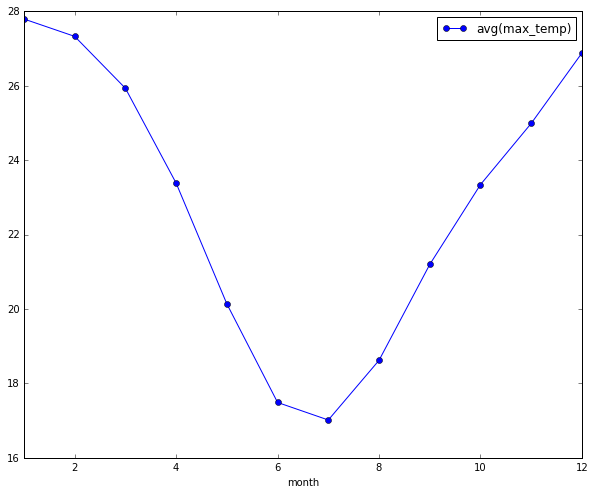

In [81]:
temps_by_month.plot(x='month', y='avg(max_temp)', style=['bo-'])
plt.show()

## (Optional) repeat using SQL 

In [41]:
df.registerTempTable('nsw_temp')

In [42]:
sqlContext.sql("SELECT count(*) FROM nsw_temp").toPandas()

,_c0
0,352696


In [83]:
# write a query here
sqlContext.sql("SELECT month, avg(max_temp) as avg_max_temp FROM nsw_temp GROUP BY month").toPandas()

,month,avg_max_temp
0,1,27.795612
1,2,27.328411
2,3,25.933482
3,4,23.383713
4,5,20.137379
5,6,17.487661
6,7,17.016035
7,8,18.620955
8,9,21.197723
9,10,23.344285
